K1 = 1.4 ± 0.0 m·V^0.5
K2 = 2.6 ± 0.1 m·V^0.5


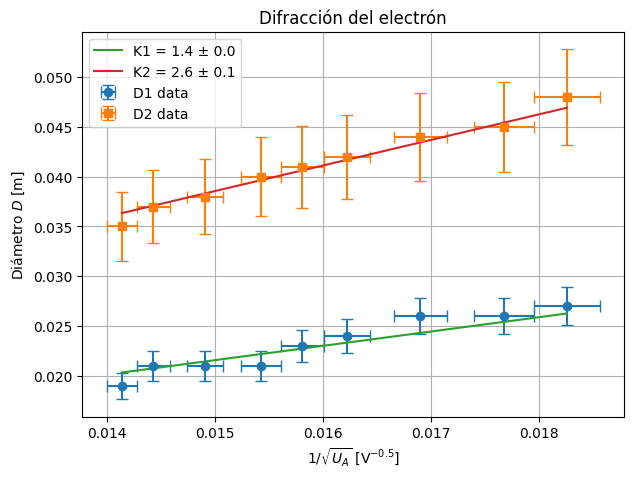

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# --- Constants ---
h = 6.626e-34  # J·s
m = 9.109e-31  # kg
e = 1.602e-19  # C

# --- Measurements ---
U = np.array([	3.0, 3.2, 3.5, 3.8, 4.0, 4.2, 	4.5, 4.8, 5.0]) * 1e3  # V
D1 = np.array([	2.7, 2.6, 2.6, 2.4,	2.3, 2.1,	2.1, 2.1, 1.9]) * 1e-2  # m
D2 = np.array([	4.8, 4.5, 4.4, 4.2,	4.1, 4.0,	3.8, 3.7, 3.5]) * 1e-2  # m

# --- Uncertainties ---
dU = 0.1 * 1000 # V
dD1 = D1 * 0.05  # 5%
dD1 = D1 * 0.05  # 5%

dD2 = D2 * 0.10  # 10%
dL = 0.05       # m

# --- Foil-to-screen distance ---
L = 0.13

# --- Slopes and their uncertainties ---
K1 = 0.020  # m*V^0.5
K2 = 0.035
sigma_K1 = 0.001
sigma_K2 = 0.002

# x-axis: 1 / sqrt(U)
X = 1 / np.sqrt(U)
dX = 0.5 * dU / U**(3/2)  # propagation: d(1/sqrt(U)) = 0.5*dU/U^(3/2)

# Weighted fit through origin: K = sum(w*x*y)/sum(w*x^2)
w1 = 1 / dD1**2
w2 = 1 / dD2**2

K1 = np.sum(w1 * X * D1) / np.sum(w1 * X**2)
K2 = np.sum(w2 * X * D2) / np.sum(w2 * X**2)

# Uncertainty in slope
sigma_K1 = np.sqrt(1 / np.sum(w1 * X**2))
sigma_K2 = np.sqrt(1 / np.sum(w2 * X**2))

print(f"K1 = {K1:.1f} ± {sigma_K1:.1f} m·V^0.5")
print(f"K2 = {K2:.1f} ± {sigma_K2:.1f} m·V^0.5")

# Plot with error bars
plt.figure(figsize=(7,5))
plt.errorbar(X, D1, yerr=dD1, xerr=dX, fmt='o', label='D1 data', capsize=4)
plt.errorbar(X, D2, yerr=dD2, xerr=dX, fmt='s', label='D2 data', capsize=4)
plt.plot(X, K1*X, '-', label=f'K1 = {K1:.1f} ± {sigma_K1:.1f}')
plt.plot(X, K2*X, '-', label=f'K2 = {K2:.1f} ± {sigma_K2:.1f}')
plt.xlabel(r'$1/\sqrt{U_A}$ [$\mathrm{V}^{-0.5}$]')
plt.ylabel(r'Diámetro $D$ [$\mathrm{m}$]')
plt.title('Difracción del electrón')
plt.legend()
plt.grid(True)
plt.show()



In [233]:


# --- Calculate d using derivatives for error ---
def d_error(L, K, delta_L, delta_K):
    d = 2 * L * h / (K * np.sqrt(2 * m * e))
    dd_dL = 2 * h / (K * np.sqrt(2 * m * e))
    dd_dK = -2 * L * h / (K**2 * np.sqrt(2 * m * e))
    delta_d = np.sqrt((dd_dL*delta_L)**2 + (dd_dK*delta_K)**2)
    return d, delta_d

d1_calc, d1_err = d_error(L, K1, dL, sigma_K1)
d2_calc, d2_err = d_error(L, K2, dL, sigma_K2)

# --- Calculate experimental lambda and errors ---
def lambda_error(d, D, L, delta_d, delta_D, delta_L):
    lam = d * D / (2 * L)
    dlam_dd = D / (2 * L)
    dlam_dD = d / (2 * L)
    dlam_dL = -d * D / (2 * L**2)
    delta_lam = np.sqrt((dlam_dd*delta_d)**2 + (dlam_dD*delta_D)**2 + (dlam_dL*delta_L)**2)
    return lam, delta_lam

lambda1_exp, lambda1_err = lambda_error(d1_calc, D1, L, d1_err, dD1, dL)
lambda2_exp, lambda2_err = lambda_error(d2_calc, D2, L, d2_err, dD2, dL)

# --- Theoretical wavelength ---
good_d2 = 1.23e-10
good_d1 = 2.13e-10
lambda1_th, lambda1_th_err = lambda_error(good_d1, D1, L, 0, dD1, dL)
lambda2_th, lambda2_th_err = lambda_error(good_d1, D1, L, 0, dD1, dL)

D1_err = D1 * 0.05
D2_err = D2 * 0.1
# --- Print table ---
print("UA(kV)  D1(cm)  λ1_exp ± Δλ1  λ_th ± err(A)  D2(cm)  λ2_exp ± Δλ2  λ_th ± err(A)")
for i in range(len(U)):
    print(f"{U[i]/1e3:4.1f}  {D1[i]*100:4.1f} ± {D1_err[i]*100:4.1f}  {lambda1_exp[i]*1e10:6.1f} ± {lambda1_err[i]*1e10:5.1f}  "
          f"{lambda1_th[i]*1e10:6.3f} ± {lambda1_th_err[i]*1e9:6.3f} {D2[i]*100:4.1f} ± {D2_err[i]*100:4.1f}  {lambda2_exp[i]*1e10:6.2f} ± {lambda2_err[i]*1e9:5.2f}  {lambda2_th[i]*1e10:6.2f} ± {lambda2_th_err[i]*1e10:6.2f}")

# --- Print calculated d values ---
print(f"\nd1 = {d1_calc:.3e} ± {d1_err:.3e} m")
print(f"d2 = {d2_calc:.3e} ± {d2_err:.3e} m")


UA(kV)  D1(cm)  λ1_exp ± Δλ1  λ_th ± err(A)  D2(cm)  λ2_exp ± Δλ2  λ_th ± err(A)
 3.0   2.7 ±  0.1     0.2 ±   0.1   0.221 ±  0.009  4.8 ±  0.5    0.23 ±  0.01    0.22 ±   0.09
 3.2   2.6 ±  0.1     0.2 ±   0.1   0.213 ±  0.008  4.5 ±  0.4    0.21 ±  0.01    0.21 ±   0.08
 3.5   2.6 ±  0.1     0.2 ±   0.1   0.213 ±  0.008  4.4 ±  0.4    0.21 ±  0.01    0.21 ±   0.08
 3.8   2.4 ±  0.1     0.2 ±   0.1   0.197 ±  0.008  4.2 ±  0.4    0.20 ±  0.01    0.20 ±   0.08
 4.0   2.3 ±  0.1     0.2 ±   0.1   0.188 ±  0.007  4.1 ±  0.4    0.20 ±  0.01    0.19 ±   0.07
 4.2   2.1 ±  0.1     0.2 ±   0.1   0.172 ±  0.007  4.0 ±  0.4    0.19 ±  0.01    0.17 ±   0.07
 4.5   2.1 ±  0.1     0.2 ±   0.1   0.172 ±  0.007  3.8 ±  0.4    0.18 ±  0.01    0.17 ±   0.07
 4.8   2.1 ±  0.1     0.2 ±   0.1   0.172 ±  0.007  3.7 ±  0.4    0.18 ±  0.01    0.17 ±   0.07
 5.0   1.9 ±  0.1     0.2 ±   0.1   0.156 ±  0.006  3.5 ±  0.4    0.17 ±  0.01    0.16 ±   0.06

d1 = 2.217e-10 ± 8.542e-11 m
d2 = 1.241e-10 ± 4.791e-1

In [234]:




# Longitud de onda teórica en metros, convertida a nm
lambda_th = h / np.sqrt(2 * m * e ) * 1/ np.sqrt(U) * 1e9  # nm
lambda_th_err = 0.5 * h / np.sqrt(2 * m * e ) * U**(-3/2) *1e9 * 0.1*1e3
# Imprimir con 1 decimal
for i in range(len(lambda1_th)):
    print(f"{lambda_th[i]:.4f} ± {lambda_th_err[i]:.4f} ")



0.0224 ± 0.0004 
0.0217 ± 0.0003 
0.0207 ± 0.0003 
0.0199 ± 0.0003 
0.0194 ± 0.0002 
0.0189 ± 0.0002 
0.0183 ± 0.0002 
0.0177 ± 0.0002 
0.0173 ± 0.0002 


In [235]:
1.9 * 0.05

0.095